In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
linreg = LinearRegression()
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import itertools

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset, view shape to see number of columns
df = pd.read_csv('ncaa_stats.csv')
print(df.shape)

(29805, 133)


In [3]:
df.head()

,Unnamed: 0,game_id,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,...,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls,created
0,0,b4451a02-26c5-4005-9ac8-b06c1f71e661,2015,closed,full,NaN,2015-11-24,2015-11-24 21:30:00+00:00,NaN,NaN,...,36.0,17.0,0.0,31.0,5.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:58+00:00
1,1,b2f579ca-9eff-4b2b-a747-81169399c2e8,2015,closed,full,NaN,2015-11-24,2015-11-24 02:00:00+00:00,NaN,NaN,...,16.0,25.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53+00:00
2,2,571be71c-a5bf-446e-bf21-30eb6c54ac5e,2015,closed,full,NaN,2015-11-25,2015-11-25 19:30:00+00:00,NaN,NaN,...,6.0,6.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:58+00:00
3,3,d6617923-0b23-49e4-af9b-9e4d0243e45c,2015,closed,full,NaN,2015-12-19,2015-12-19 04:00:00+00:00,NaN,NaN,...,2.0,13.0,1.0,15.0,3.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53+00:00
4,4,ffb463a4-dd3c-4ed9-b503-311b95ef0295,2015,closed,full,NaN,2015-12-20,2015-12-20 04:00:00+00:00,NaN,NaN,...,6.0,7.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53+00:00


In [4]:
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [5]:
# drop columns not relevant to project

del df['status'], df['coverage'], df['gametime'], df['conference_game'], df['possession_arrow']
del df['venue_id'], df['venue_state'], df['venue_address'], df['venue_zip'], df['venue_country']
del df['tournament'], df['tournament_type'], df['tournament_round'], df['tournament_game_no']
del df['h_id'], df['h_league_id'], df['h_league_name'], df['h_league_alias'], df['h_conf_id']
del df['h_division_id'], df['h_division_name'], df['h_logo_large'], df['h_logo_medium'], df['h_logo_small']
del df['h_points_game'], df['a_id'], df['a_league_id'], df['a_league_name'], df['a_league_alias']
del df['a_conf_id'], df['a_division_id'], df['a_division_name'], df['a_logo_large'], df['a_logo_medium']
del df['a_logo_small'], df['a_points_game'], df['created']


In [6]:
print(df.shape)
df.head()

(29805, 95)


,game_id,season,neutral_site,scheduled_date,attendance,lead_changes,times_tied,periods,venue_city,venue_name,...,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls
0,b4451a02-26c5-4005-9ac8-b06c1f71e661,2015,NaN,2015-11-24,2400.0,3.0,2.0,2.0,Maui,Lahaina Civic Center,...,93.0,36.0,17.0,0.0,31.0,5.0,0.0,0.0,0.0,0.0
1,b2f579ca-9eff-4b2b-a747-81169399c2e8,2015,NaN,2015-11-24,2400.0,1.0,0.0,2.0,Maui,Lahaina Civic Center,...,123.0,16.0,25.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0
2,571be71c-a5bf-446e-bf21-30eb6c54ac5e,2015,NaN,2015-11-25,2400.0,2.0,0.0,2.0,Maui,Lahaina Civic Center,...,100.0,6.0,6.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
3,d6617923-0b23-49e4-af9b-9e4d0243e45c,2015,NaN,2015-12-19,8032.0,9.0,1.0,2.0,Portland,Moda Center,...,69.0,2.0,13.0,1.0,15.0,3.0,0.0,0.0,0.0,0.0
4,ffb463a4-dd3c-4ed9-b503-311b95ef0295,2015,NaN,2015-12-20,8555.0,1.0,3.0,2.0,Portland,Moda Center,...,71.0,6.0,7.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [7]:
#list(df)

Print and sum null values to see what columns have significant data missing. Drop columns with a significant number of null values and drop the rows containing null values in columns with low number of null values.

In [8]:
df.isnull().sum()

game_id                         0
season                          0
neutral_site                17827
scheduled_date                  0
attendance                   5271
lead_changes                 4338
times_tied                   4374
periods                        31
venue_city                     15
venue_name                     15
venue_capacity                147
h_name                          1
h_market                        0
h_alias                         0
h_conf_name                     0
h_conf_alias                    0
h_division_alias                0
h_rank                          0
h_minutes                    4009
h_field_goals_made           4009
h_field_goals_att            4009
h_field_goals_pct            4009
h_three_points_made          4009
h_three_points_att           4009
h_three_points_pct           4009
h_two_points_made            4009
h_two_points_att             4009
h_two_points_pct             4009
h_blocked_att                4009
h_free_throws_

In [9]:
del df['a_coach_tech_fouls'], df['a_team_tech_fouls'], df['a_foulouts'], df['a_ejections'], df['neutral_site']

In [10]:
df = df.dropna()

In [11]:
#used to varify null vlaues were gone, don't need to print out
#df.isnull().sum()

For this project, only Division 1 data should be considered. Check to see how many unique values are in the division column and delete the all but division 1 values.

In [12]:
division_h = df.h_division_alias.unique()
print(division_h)

['D1' 'D2']


In [13]:
df = df[df.h_division_alias != 'D2']

In [14]:
print(df.h_division_alias.unique())

['D1']


In [15]:
division_a = df.a_division_alias.unique()
print(division_a)

['D1' 'D3' 'D2' 'NAIA' 'NCAIA' 'NCCAA']


In [16]:
df = df[df.a_division_alias != 'D2']
df = df[df.a_division_alias != 'D3']
df = df[df.a_division_alias != 'NAIA']
df = df[df.a_division_alias != 'NCAIA']
df = df[df.a_division_alias != 'NCCAA']

In [17]:
print(df.a_division_alias.unique())

['D1']


In order to focus one what impacts wins and losses we must create a win/loss feature. This will be done by subtracting the number of away points from the number of home points. If the value is possitive (greater than zero) this means the home team won the game. If the value is negative, the home team lost the game i.e. the away team won.  

In [18]:
df['win_h'] = (df.h_points - df.a_points)

In [19]:
#away team wins would be reverse of home team wins, do not need to print
#df['win_a'] = (df.a_points - df.h_points)

In [20]:
#add new feature to the dataframe
df['win_h'].head()

21      28.0
1146     5.0
1176    -2.0
2291   -12.0
2637    17.0
Name: win_h, dtype: float64

In [21]:
df.head()

,game_id,season,scheduled_date,attendance,lead_changes,times_tied,periods,venue_city,venue_name,venue_capacity,...,a_personal_fouls,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,win_h
21,0557a5b2-0320-4f7d-aa72-f871c01cfd63,2015,2015-11-16,3427.0,0.0,1.0,2.0,Stanford,Maples Pavilion,7392.0,...,30.0,65.0,0.0,13.0,2.0,6.0,4.0,0.0,0.0,28.0
1146,f12a8bfb-a4ef-4953-96a3-266cb81c5a0b,2015,2015-11-14,6904.0,20.0,8.0,2.0,Winston-Salem,Lawrence Joel Veterans Memorial Coliseum,14665.0,...,27.0,73.0,0.0,14.0,0.0,34.0,4.0,0.0,0.0,5.0
1176,8303ed5b-2f12-427d-bd89-4f8fa109ac6c,2015,2015-12-19,13174.0,3.0,6.0,3.0,New York,Madison Square Garden,19812.0,...,26.0,77.0,0.0,14.0,1.0,10.0,8.0,0.0,0.0,-2.0
2291,cc300fad-b02a-4a2c-bee4-5e3a85aff54b,2015,2015-12-31,5873.0,5.0,5.0,2.0,Rosemont,Allstate Arena,17500.0,...,22.0,70.0,0.0,25.0,1.0,30.0,4.0,0.0,0.0,-12.0
2637,99ac0cdb-ad8c-4c97-b0c4-9027ebe095fe,2013,2013-12-30,4799.0,0.0,1.0,2.0,Stanford,Maples Pavilion,7392.0,...,25.0,62.0,0.0,11.0,0.0,8.0,4.0,0.0,0.0,17.0


In order to perform further testing, the win/loss column will be represented by a 0 or 1 rather than a W or L. For the sake of testing, the tests will be from the home team's point of view, meaning a 1 will represent a win for the home team and a 0 will respresent a loss for the home team.

In [22]:
#changing possitive/negative results into a number for testing
df.win_h[df.win_h > 0] = 1
df.win_h[df.win_h < 0] = 0


Now that we have cleaned our dataframe we will want to save it before making any more changes.

In [23]:
ncaa = df
ncaa.to_csv('ncaa.csv')

In [24]:
ncaa = pd.read_csv('ncaa.csv')

In [25]:
ncaa.head()

,Unnamed: 0,game_id,season,scheduled_date,attendance,lead_changes,times_tied,periods,venue_city,venue_name,...,a_personal_fouls,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,win_h
0,21,0557a5b2-0320-4f7d-aa72-f871c01cfd63,2015,2015-11-16,3427.0,0.0,1.0,2.0,Stanford,Maples Pavilion,...,30.0,65.0,0.0,13.0,2.0,6.0,4.0,0.0,0.0,1.0
1,1146,f12a8bfb-a4ef-4953-96a3-266cb81c5a0b,2015,2015-11-14,6904.0,20.0,8.0,2.0,Winston-Salem,Lawrence Joel Veterans Memorial Coliseum,...,27.0,73.0,0.0,14.0,0.0,34.0,4.0,0.0,0.0,1.0
2,1176,8303ed5b-2f12-427d-bd89-4f8fa109ac6c,2015,2015-12-19,13174.0,3.0,6.0,3.0,New York,Madison Square Garden,...,26.0,77.0,0.0,14.0,1.0,10.0,8.0,0.0,0.0,0.0
3,2291,cc300fad-b02a-4a2c-bee4-5e3a85aff54b,2015,2015-12-31,5873.0,5.0,5.0,2.0,Rosemont,Allstate Arena,...,22.0,70.0,0.0,25.0,1.0,30.0,4.0,0.0,0.0,0.0
4,2637,99ac0cdb-ad8c-4c97-b0c4-9027ebe095fe,2013,2013-12-30,4799.0,0.0,1.0,2.0,Stanford,Maples Pavilion,...,25.0,62.0,0.0,11.0,0.0,8.0,4.0,0.0,0.0,1.0


In [26]:
#hide unnamed column
ncaa = ncaa.drop(ncaa.columns[ncaa.columns.str.contains('unnamed',case = False)],axis = 1)

In [27]:
#drop home win column because that is our target
target = df['win_h']
df.drop('win_h', axis=1, inplace=True)

In [28]:
target.head()

21      1.0
1146    1.0
1176    0.0
2291    0.0
2637    1.0
Name: win_h, dtype: float64

In [29]:
df.head()

,game_id,season,scheduled_date,attendance,lead_changes,times_tied,periods,venue_city,venue_name,venue_capacity,...,a_assists_turnover_ratio,a_personal_fouls,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls
21,0557a5b2-0320-4f7d-aa72-f871c01cfd63,2015,2015-11-16,3427.0,0.0,1.0,2.0,Stanford,Maples Pavilion,7392.0,...,0.79,30.0,65.0,0.0,13.0,2.0,6.0,4.0,0.0,0.0
1146,f12a8bfb-a4ef-4953-96a3-266cb81c5a0b,2015,2015-11-14,6904.0,20.0,8.0,2.0,Winston-Salem,Lawrence Joel Veterans Memorial Coliseum,14665.0,...,1.33,27.0,73.0,0.0,14.0,0.0,34.0,4.0,0.0,0.0
1176,8303ed5b-2f12-427d-bd89-4f8fa109ac6c,2015,2015-12-19,13174.0,3.0,6.0,3.0,New York,Madison Square Garden,19812.0,...,0.89,26.0,77.0,0.0,14.0,1.0,10.0,8.0,0.0,0.0
2291,cc300fad-b02a-4a2c-bee4-5e3a85aff54b,2015,2015-12-31,5873.0,5.0,5.0,2.0,Rosemont,Allstate Arena,17500.0,...,1.25,22.0,70.0,0.0,25.0,1.0,30.0,4.0,0.0,0.0
2637,99ac0cdb-ad8c-4c97-b0c4-9027ebe095fe,2013,2013-12-30,4799.0,0.0,1.0,2.0,Stanford,Maples Pavilion,7392.0,...,1.38,25.0,62.0,0.0,11.0,0.0,8.0,4.0,0.0,0.0


In [30]:
ncaa.head()

,game_id,season,scheduled_date,attendance,lead_changes,times_tied,periods,venue_city,venue_name,venue_capacity,...,a_personal_fouls,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,win_h
0,0557a5b2-0320-4f7d-aa72-f871c01cfd63,2015,2015-11-16,3427.0,0.0,1.0,2.0,Stanford,Maples Pavilion,7392.0,...,30.0,65.0,0.0,13.0,2.0,6.0,4.0,0.0,0.0,1.0
1,f12a8bfb-a4ef-4953-96a3-266cb81c5a0b,2015,2015-11-14,6904.0,20.0,8.0,2.0,Winston-Salem,Lawrence Joel Veterans Memorial Coliseum,14665.0,...,27.0,73.0,0.0,14.0,0.0,34.0,4.0,0.0,0.0,1.0
2,8303ed5b-2f12-427d-bd89-4f8fa109ac6c,2015,2015-12-19,13174.0,3.0,6.0,3.0,New York,Madison Square Garden,19812.0,...,26.0,77.0,0.0,14.0,1.0,10.0,8.0,0.0,0.0,0.0
3,cc300fad-b02a-4a2c-bee4-5e3a85aff54b,2015,2015-12-31,5873.0,5.0,5.0,2.0,Rosemont,Allstate Arena,17500.0,...,22.0,70.0,0.0,25.0,1.0,30.0,4.0,0.0,0.0,0.0
4,99ac0cdb-ad8c-4c97-b0c4-9027ebe095fe,2013,2013-12-30,4799.0,0.0,1.0,2.0,Stanford,Maples Pavilion,7392.0,...,25.0,62.0,0.0,11.0,0.0,8.0,4.0,0.0,0.0,1.0


# Creating Offensive and Defensive tables

The table below is created to contain all categories related to offense for the home team. I decided to use the three point, two points, and free throws percentages because it is a more descriptive value that total shots taken or made. I also chose to not include field goal percentage because it is composed of two and three point shots. I thought it would be better for training and tetsing to use the two categories individually.

In [31]:
offense_h = df[['h_points', 'h_three_points_pct', 'h_two_points_pct', 
                'h_free_throws_pct', 'h_offensive_rebounds', 'h_assists', 
                'h_fast_break_pts', 'h_second_chance_pts', 'h_points_off_turnovers']]


In [32]:
offense_h.head()

,h_points,h_three_points_pct,h_two_points_pct,h_free_throws_pct,h_offensive_rebounds,h_assists,h_fast_break_pts,h_second_chance_pts,h_points_off_turnovers
21,93.0,41.7,62.8,60.0,14.0,20.0,0.0,32.0,40.0
1146,78.0,15.0,46.9,76.7,23.0,12.0,0.0,50.0,14.0
1176,75.0,28.6,30.6,72.4,12.0,10.0,0.0,40.0,40.0
2291,58.0,33.3,40.0,54.2,10.0,11.0,0.0,15.0,18.0
2637,79.0,50.0,60.6,77.4,2.0,13.0,0.0,2.0,14.0


The table below is created to contain the categories related to defense for the home team.

In [33]:
defense_h = df[['h_defensive_rebounds', 'h_steals', 'h_blocks']]

In [34]:
defense_h.head()

,h_defensive_rebounds,h_steals,h_blocks
21,30.0,6.0,4.0
1146,33.0,2.0,11.0
1176,18.0,7.0,5.0
2291,24.0,4.0,2.0
2637,30.0,3.0,6.0


In [35]:
#offensive category for away team
offense_a = df[['a_points', 'a_three_points_pct','a_two_points_pct', 
                'a_free_throws_pct', 'a_offensive_rebounds', 'a_assists', 
                'a_fast_break_pts', 'a_second_chance_pts', 'a_points_off_turnovers']]


In [36]:
offense_a.head()

,a_points,a_three_points_pct,a_two_points_pct,a_free_throws_pct,a_offensive_rebounds,a_assists,a_fast_break_pts,a_second_chance_pts,a_points_off_turnovers
21,65.0,32.1,38.1,61.5,6.0,11.0,0.0,13.0,6.0
1146,73.0,36.0,42.5,48.0,9.0,12.0,0.0,14.0,34.0
1176,77.0,16.7,56.8,78.3,9.0,16.0,0.0,14.0,10.0
2291,70.0,43.5,34.4,78.3,8.0,15.0,0.0,25.0,30.0
2637,62.0,25.0,40.0,68.8,11.0,11.0,0.0,11.0,8.0


In [37]:
#defensive category for away team
defense_a = df[['a_defensive_rebounds', 'a_steals', 'a_blocks', ]]

In [38]:
defense_a.head()

,a_defensive_rebounds,a_steals,a_blocks
21,14.0,2.0,1.0
1146,23.0,10.0,4.0
1176,39.0,2.0,9.0
2291,24.0,8.0,6.0
2637,17.0,5.0,1.0


In [39]:
offense_h.corr()

,h_points,h_three_points_pct,h_two_points_pct,h_free_throws_pct,h_offensive_rebounds,h_assists,h_fast_break_pts,h_second_chance_pts,h_points_off_turnovers
h_points,1.000000,0.498072,0.533041,0.176549,0.153120,0.655362,0.365795,0.312289,0.377289
h_three_points_pct,0.498072,1.000000,0.075390,0.025455,-0.170032,0.464201,0.077414,-0.014736,0.130329
h_two_points_pct,0.533041,0.075390,1.000000,0.019739,-0.215200,0.441959,0.282529,-0.009439,0.212964
h_free_throws_pct,0.176549,0.025455,0.019739,1.000000,-0.100719,-0.013885,-0.012909,-0.024714,0.032325
h_offensive_rebounds,0.153120,-0.170032,-0.215200,-0.100719,1.000000,0.058183,0.080659,0.689543,0.110649
h_assists,0.655362,0.464201,0.441959,-0.013885,0.058183,1.000000,0.337941,0.160595,0.268668
h_fast_break_pts,0.365795,0.077414,0.282529,-0.012909,0.080659,0.337941,1.000000,0.083722,0.302001
h_second_chance_pts,0.312289,-0.014736,-0.009439,-0.024714,0.689543,0.160595,0.083722,1.000000,0.161652
h_points_off_turnovers,0.377289,0.130329,0.212964,0.032325,0.110649,0.268668,0.302001,0.161652,1.000000


Use a heatmap to plot the correlation to help see the relationships better visually.

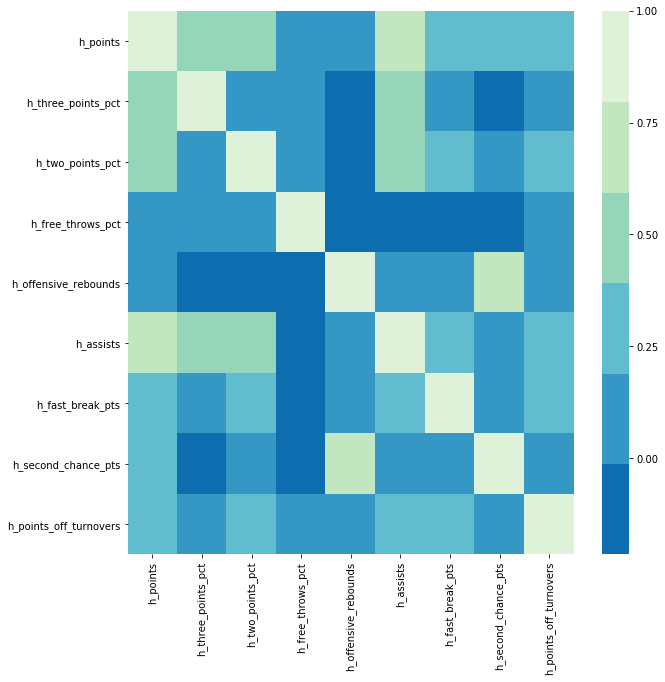

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(offense_h.corr(), cmap=sns.color_palette("GnBu_r"))

Ran a correlation for the offensive values to see what is related. As you can see, points is correlated with three point percentage, two point percentage, as well as assists. This is not surpsing because all these lead to points. These values, threes, twos, and assits are also all relatively correlated wirh eachother.

In [41]:
defense_h.corr()

,h_defensive_rebounds,h_steals,h_blocks
h_defensive_rebounds,1.000000,-0.085674,0.258006
h_steals,-0.085674,1.000000,0.068710
h_blocks,0.258006,0.068710,1.000000


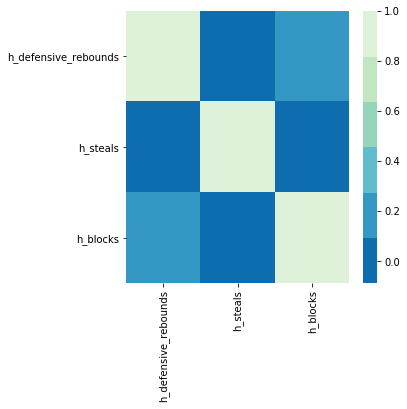

In [42]:
plt.figure(figsize=(5, 5))
sns.heatmap(defense_h.corr(), cmap=sns.color_palette("GnBu_r"))

As you can see from the corrlation above, the defensive categories are not strongly related.

# Regression Analysis
Use logistic regression to describe the data and explain the relationship between the target (win/loss) and the independent features.

#### Offense 

In [43]:
ncaa_h_off = ncaa[['h_points', 'h_three_points_pct', 'h_two_points_pct', 
                'h_free_throws_pct', 'h_offensive_rebounds', 'h_assists', 
                'h_fast_break_pts', 'h_second_chance_pts', 'h_points_off_turnovers', 'win_h']]

In [44]:
ncaa_h_off.head()

,h_points,h_three_points_pct,h_two_points_pct,h_free_throws_pct,h_offensive_rebounds,h_assists,h_fast_break_pts,h_second_chance_pts,h_points_off_turnovers,win_h
0,93.0,41.7,62.8,60.0,14.0,20.0,0.0,32.0,40.0,1.0
1,78.0,15.0,46.9,76.7,23.0,12.0,0.0,50.0,14.0,1.0
2,75.0,28.6,30.6,72.4,12.0,10.0,0.0,40.0,40.0,0.0
3,58.0,33.3,40.0,54.2,10.0,11.0,0.0,15.0,18.0,0.0
4,79.0,50.0,60.6,77.4,2.0,13.0,0.0,2.0,14.0,1.0


In [45]:
x = ncaa_h_off[ncaa_h_off.columns[:-1]]
y = ncaa_h_off.win_h

Below we will normalize the data because the features all have different values, which can lead to skewed results. We will then train/test the data to run the logistic regression.

In [46]:
for col in ncaa_h_off.columns:
    ncaa_h_off[col] = (ncaa_h_off[col]-min(ncaa_h_off[col]))/ (max(ncaa_h_off[col]) - min(ncaa_h_off[col]))
ncaa_h_off.head()


,h_points,h_three_points_pct,h_two_points_pct,h_free_throws_pct,h_offensive_rebounds,h_assists,h_fast_break_pts,h_second_chance_pts,h_points_off_turnovers,win_h
0,0.628571,0.463333,0.654795,0.600,0.482759,0.529412,0.0,0.615385,0.62500,1.0
1,0.485714,0.166667,0.436986,0.767,0.793103,0.294118,0.0,0.961538,0.21875,1.0
2,0.457143,0.317778,0.213699,0.724,0.413793,0.235294,0.0,0.769231,0.62500,0.0
3,0.295238,0.370000,0.342466,0.542,0.344828,0.264706,0.0,0.288462,0.28125,0.0
4,0.495238,0.555556,0.624658,0.774,0.068966,0.323529,0.0,0.038462,0.21875,1.0


In [47]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [48]:
#fit model
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
#Your code here
model_log = logreg.fit(x_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [49]:
#predict
y_hat_test = logreg.predict(x_test)
y_hat_train = logreg.predict(x_train)

In [50]:
residuals = y_train - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0.0    2282
-1.0     665
 1.0     169
Name: win_h, dtype: int64
 0.0    0.732349
-1.0    0.213415
 1.0    0.054236
Name: win_h, dtype: float64


In [51]:
residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0.0    740
-1.0    237
 1.0     62
Name: win_h, dtype: int64
 0.0    0.712223
-1.0    0.228104
 1.0    0.059673
Name: win_h, dtype: float64


With this data set we use the accuracy to tets our results. We are using accuracy because we are testing to see if our prediction is either right or wrong. There is no penalty for a prediction being wrong, which could be the case regarding medical tetsing.

In [52]:
#test accuracy
def accuracy(y_hat, y):
    #Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
    return (tp+tn)/float(len(y_hat))

In [53]:
y_hat_test = logreg.predict(x_test)
y_hat_train = logreg.predict(x_train)

print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))

Training Accuracy:  0.7323491655969191
Testing Accuracy:  0.7122232916265641


Our model is about 71% accurate when testing our data.

In [54]:
#plotting accuracy
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(x_train, y_train)
    y_hat_test = logreg.predict(x_test)
    y_hat_train = logreg.predict(x_train)

    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))

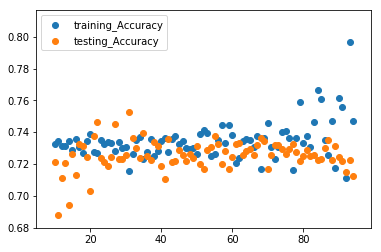

In [55]:
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()

In [56]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[ 332  224]
 [ 900 2450]]


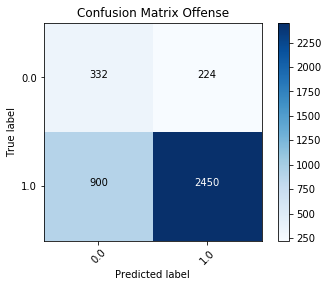

In [57]:
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

plt.title('Confusion Matrix Offense')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

The confusion matrix shows us thst our model accurately predicts a win when the home team wins a large number of times. Comparatively there is a low number of predictions of a loss when a team looses. This could mean that our data and tests are a better predictive of wins than they are of losses.

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.5971223  0.4028777 ]
 [0.26865672 0.73134328]]


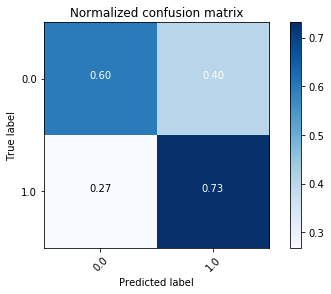

In [59]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Both original and normalized confusion matrices show that our accuracy is high when predicting a win accurately. 

In [60]:
y_score = logreg.fit(x_train, y_train).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7259686835229093


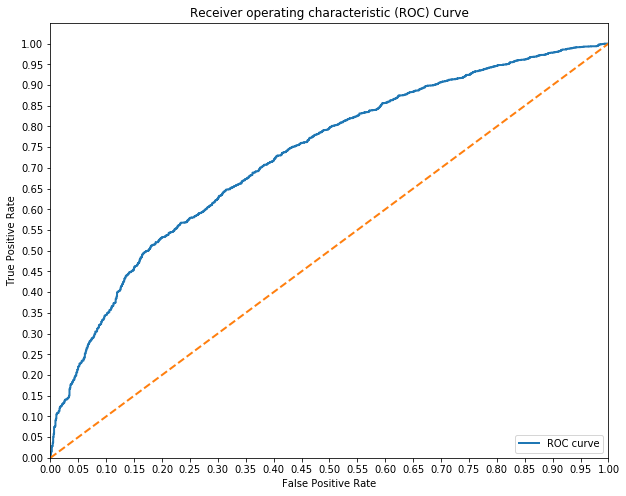

In [61]:
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Defense

In [62]:
ncaa_h_def = ncaa[['h_defensive_rebounds', 'h_steals', 'h_blocks', 'win_h']]

In [63]:
ncaa_h_def.head()

,h_defensive_rebounds,h_steals,h_blocks,win_h
0,30.0,6.0,4.0,1.0
1,33.0,2.0,11.0,1.0
2,18.0,7.0,5.0,0.0
3,24.0,4.0,2.0,0.0
4,30.0,3.0,6.0,1.0


In [64]:
x = ncaa_h_def[ncaa_h_def.columns[:-1]]
y = ncaa_h_def.win_h

Must normalize the data so the features can be compared equally.

In [65]:
for col in ncaa_h_def.columns:
    ncaa_h_def[col] = (ncaa_h_def[col]-min(ncaa_h_def[col]))/ (max(ncaa_h_def[col]) - min(ncaa_h_def[col]))
ncaa_h_def.head()


,h_defensive_rebounds,h_steals,h_blocks,win_h
0,0.568182,0.315789,0.2500,1.0
1,0.636364,0.105263,0.6875,1.0
2,0.295455,0.368421,0.3125,0.0
3,0.431818,0.210526,0.1250,0.0
4,0.568182,0.157895,0.3750,1.0


In [66]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [67]:
#fit model
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
#Your code here
model_log = logreg.fit(x_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [68]:
#predict
y_hat_test = logreg.predict(x_test)
y_hat_train = logreg.predict(x_train)

In [69]:
residuals = y_train - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0.0    2144
-1.0     972
Name: win_h, dtype: int64
 0.0    0.688062
-1.0    0.311938
Name: win_h, dtype: float64


In [70]:
#test accuracy
def accuracy(y_hat, y):
    #Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
    return (tp+tn)/float(len(y_hat))

In [71]:
y_hat_test = logreg.predict(x_test)
y_hat_train = logreg.predict(x_train)

print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))

Training Accuracy:  0.6880616174582799
Testing Accuracy:  0.6766121270452358


Given the defensive data, the model accurately predicts the correct outcome about 68% of the time.

In [72]:
#plotting accuracy
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(x_train, y_train)
    y_hat_test = logreg.predict(x_test)
    y_hat_train = logreg.predict(x_train)

    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))

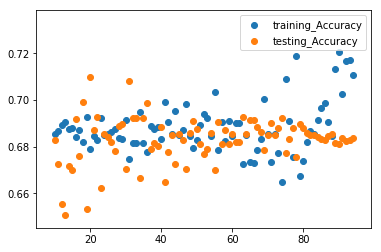

In [73]:
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()

In [74]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[   0    0]
 [1236 2670]]


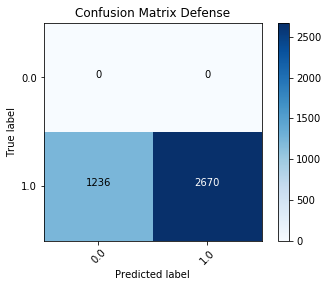

In [75]:
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

plt.title('Confusion Matrix Defense')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

Like the confusion matrix for offense values, the defense can accurately contribute to selecting when a team wins a high number of times. This also shows the it is poor when predicting a loss.

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[       nan        nan]
 [0.31643625 0.68356375]]


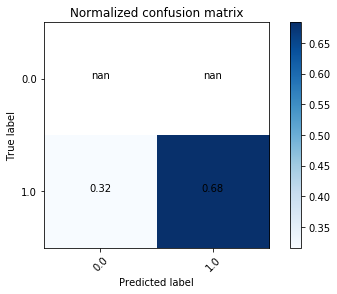

In [77]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [78]:
y_score = logreg.fit(x_train, y_train).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7744397173436118


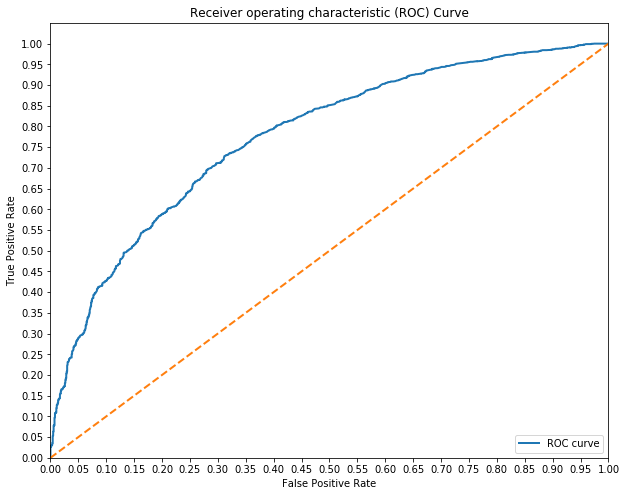

In [79]:
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Offensive Score


Below we will use feature engineering to create a new feature. This will be offensive and defensive score. The offense and defensive score categories will weight the importance of features within the offense and defense tables. We will use this new weighted score to see if/how it is a good predictor of the outcome of a game.

In [80]:
offense_h['h_offense_score'] = ((.32*df.h_three_points_pct)+(.23*df.h_two_points_pct)+
                         (.26*df.h_free_throws_pct)+(.31*df.h_offensive_rebounds)+
                         (.29*df.h_assists)+(.35*df.h_points)+(.25*df.h_fast_break_pts)+
                         (.27*df.h_points_off_turnovers)-(.24*df.h_turnovers))

Above are the weighted offensive features combined to create a new one. Turnovers is also included negatively because this impacts the offense in a negative way. I decided to use turnovers as a negative for the offense because a lot of times a turnover results from a bad offensive play versus a positive play for the defense.

In [81]:
offense_h['h_offense_score'] = round(offense_h['h_offense_score'],2)

In [82]:
offense_h.head()

,h_points,h_three_points_pct,h_two_points_pct,h_free_throws_pct,h_offensive_rebounds,h_assists,h_fast_break_pts,h_second_chance_pts,h_points_off_turnovers,h_offense_score
21,93.0,41.7,62.8,60.0,14.0,20.0,0.0,32.0,40.0,95.20
1146,78.0,15.0,46.9,76.7,23.0,12.0,0.0,50.0,14.0,73.38
1176,75.0,28.6,30.6,72.4,12.0,10.0,0.0,40.0,40.0,77.48
2291,58.0,33.3,40.0,54.2,10.0,11.0,0.0,15.0,18.0,62.04
2637,79.0,50.0,60.6,77.4,2.0,13.0,0.0,2.0,14.0,83.48


Plot histograms of the offensive features to see the distribution

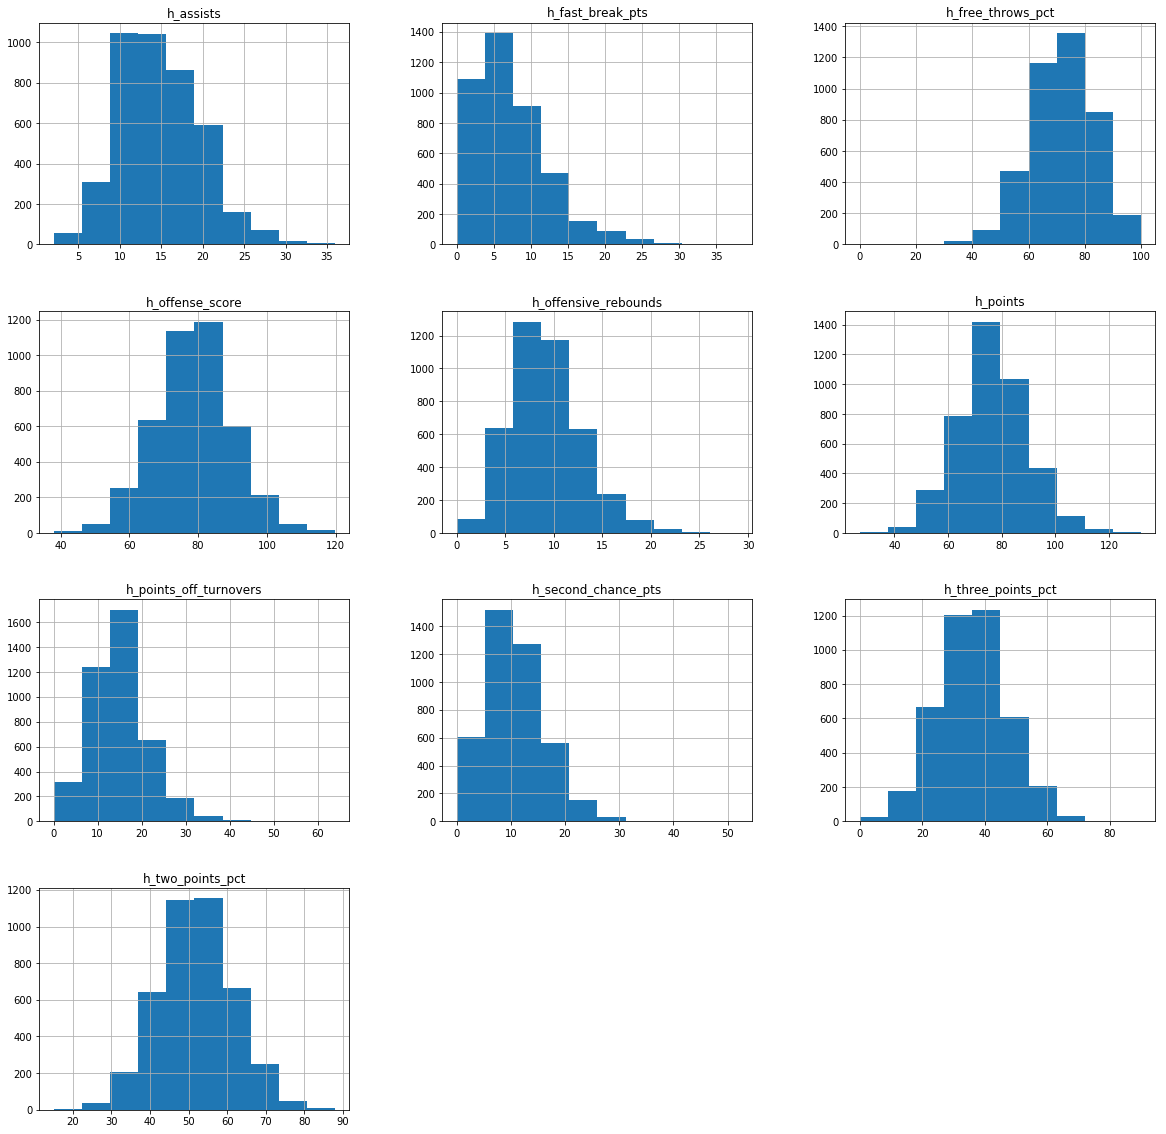

In [83]:
offense_h.hist(figsize =(20,20));

Find minimum, maximum, median, and mean values of the offensive score feature to better understand the values.

In [84]:
h_off_mean = offense_h.h_offense_score.mean()
h_off_min = offense_h.h_offense_score.min()
h_off_med = offense_h.h_offense_score.median()
h_off_max = offense_h.h_offense_score.max()

print("The home offensive score mean is", round(h_off_mean,2))
print("The home offensive score min is", round(h_off_min,2))
print("The home offensive score median is", round(h_off_med,2))
print("The home offensive score max is", round(h_off_max,2))

The home offensive score mean is 78.77
The home offensive score min is 37.95
The home offensive score median is 78.91
The home offensive score max is 119.93


# Defensive Score

Below is the newly created defensive score feature. This new feature combines the weighted values of the defense tbale.

In [85]:
defense_h['h_defense_score'] = ((2.7*defense_h.h_defensive_rebounds)+
                               (1*defense_h.h_steals)+(1*defense_h.h_blocks))


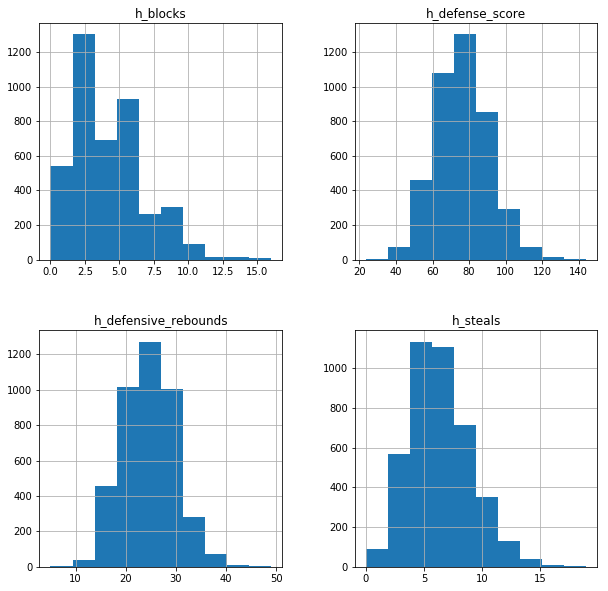

In [86]:
defense_h.hist(figsize =(10,10));

In [87]:
h_def_mean = defense_h.h_defense_score.mean()
h_def_min = defense_h.h_defense_score.min()
h_def_med = defense_h.h_defense_score.median()
h_def_max = defense_h.h_defense_score.max()

print("The home deffensive score mean is", round(h_def_mean,2))
print("The home deffensive score min is", round(h_def_min,2))
print("The home deffensive score median is", round(h_def_med,2))
print("The home deffensive score max is", round(h_def_max,2))

The home deffensive score mean is 76.35
The home deffensive score min is 23.5
The home deffensive score median is 75.8
The home deffensive score max is 144.2


# What features are important factors in win?

Below we will train and test our offensive and defensive data. We will use the trained data to create a decision tree classifier to see what features are important and contributing factors to predict the outcome of a game.

In [88]:
offense_h.head()

,h_points,h_three_points_pct,h_two_points_pct,h_free_throws_pct,h_offensive_rebounds,h_assists,h_fast_break_pts,h_second_chance_pts,h_points_off_turnovers,h_offense_score
21,93.0,41.7,62.8,60.0,14.0,20.0,0.0,32.0,40.0,95.20
1146,78.0,15.0,46.9,76.7,23.0,12.0,0.0,50.0,14.0,73.38
1176,75.0,28.6,30.6,72.4,12.0,10.0,0.0,40.0,40.0,77.48
2291,58.0,33.3,40.0,54.2,10.0,11.0,0.0,15.0,18.0,62.04
2637,79.0,50.0,60.6,77.4,2.0,13.0,0.0,2.0,14.0,83.48


In [89]:
offense_h_train, offense_h_test, target_train, target_test = train_test_split(
    offense_h, target, test_size =.25, random_state=123)

In [90]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(offense_h_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
tree_clf.feature_importances_

array([0.02240784, 0.01844134, 0.02758703, 0.07444844, 0.00123933,
       0.        , 0.01386602, 0.        , 0.00359498, 0.83841502])

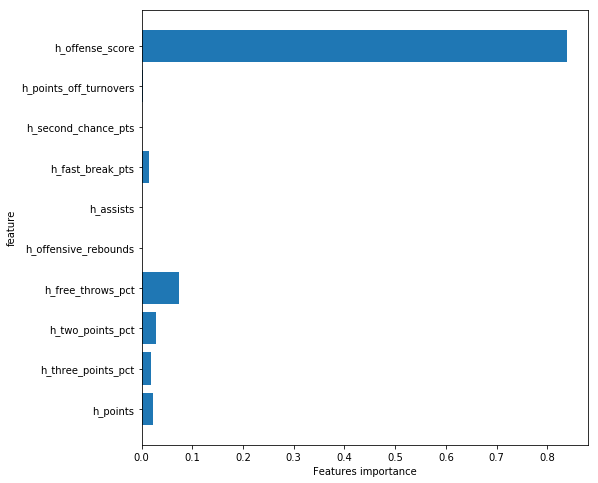

In [92]:
def plot_feature_importances(model):
    n_features = offense_h_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), offense_h_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

The graph above shows that our value of offensive score is a good predictor of what will win a basketball game.

In [93]:
#defensive score test
defense_h_train, defense_h_test, target_train, target_test = train_test_split(
    defense_h, target, test_size =.25, random_state=123)

In [94]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(defense_h_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
tree_clf.feature_importances_

array([0.0156877 , 0.13395583, 0.01391268, 0.83644379])

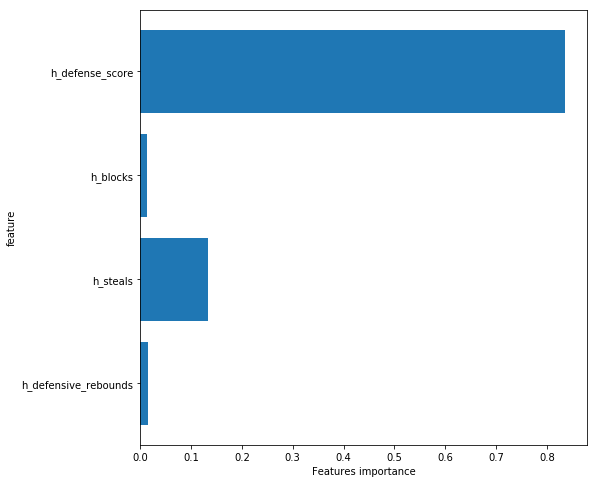

In [96]:
def plot_feature_importances(model):
    n_features = defense_h_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), defense_h_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

The above graph shows our defensive score is a good predictor for the outcome of a game.
Below we will drop the defense score to see how individual categories predict outcome of a game.

In [97]:
#drop defense score
A_dh = defense_h[['h_defensive_rebounds', 'h_steals', 'h_blocks', ]]

In [98]:
A_dh_train, A_dh_test, target_train, target_test = train_test_split(
    A_dh, target, test_size =.25, random_state=123)

In [99]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(A_dh_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
tree_clf.feature_importances_

array([0.70586726, 0.23972917, 0.05440358])

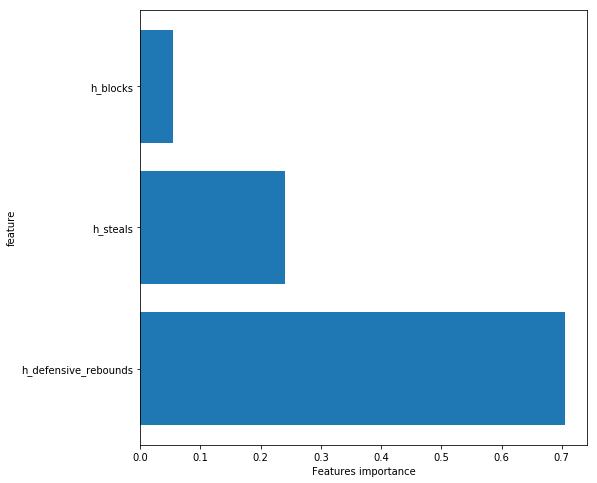

In [101]:
def plot_feature_importances(model):
    n_features = A_dh_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), A_dh_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

#### Drop offense score
Below we dropped the offense score to see what individual categories impact the outcome of a game

In [102]:
#drop offensive score to see how it predicts
A_oh = offense_h[['h_points', 'h_three_points_pct', 'h_two_points_pct', 
                'h_free_throws_pct', 'h_offensive_rebounds', 'h_assists', 
                'h_fast_break_pts', 'h_second_chance_pts', 'h_points_off_turnovers']]




In [103]:
A_oh_train, A_oh_test, target_train, target_test = train_test_split(
    A_oh, target, test_size =.25, random_state=123)

In [104]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(A_oh_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
tree_clf.feature_importances_

array([0.73341684, 0.03844897, 0.06086536, 0.00390134, 0.        ,
       0.05315196, 0.        , 0.03264372, 0.07757181])

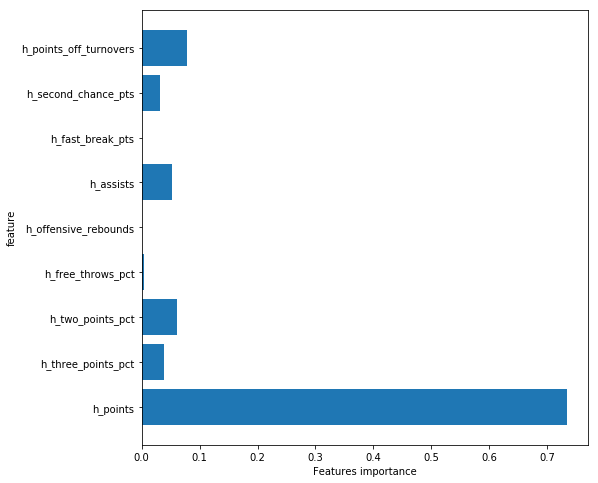

In [106]:
def plot_feature_importances(model):
    n_features = A_oh_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), A_oh_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

As you can see points is the biggest factor in predicting the outcome of a game. This is not surprsing because it is points specifically that tells you whether you win or loose. To have a better understanding of the factors contributing to a win, the points feature will also be removed.

In [107]:
#dropped offense score and points to see how it's affected
B_oh = offense_h[['h_three_points_pct', 'h_two_points_pct', 
                'h_free_throws_pct', 'h_offensive_rebounds', 'h_assists',
                'h_fast_break_pts', 'h_second_chance_pts', 'h_points_off_turnovers']]


In [108]:
B_oh_train, B_oh_test, target_train, target_test = train_test_split(
    B_oh, target, test_size =.25, random_state=123)

In [109]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(B_oh_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
tree_clf.feature_importances_

array([0.16227116, 0.17419837, 0.05676571, 0.03347115, 0.35694103,
       0.02088998, 0.01815181, 0.17731079])

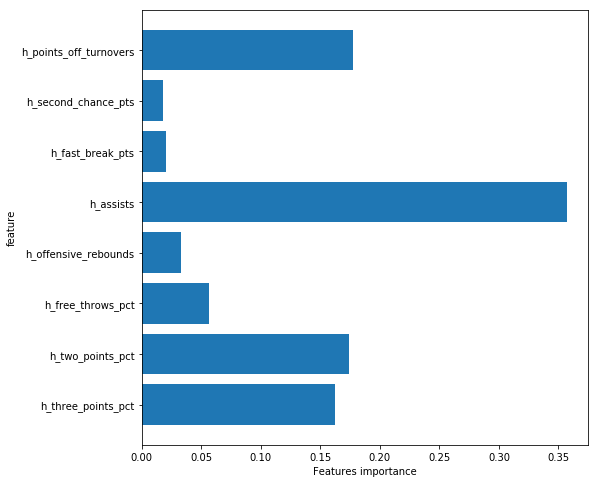

In [111]:
def plot_feature_importances(model):
    n_features = B_oh_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), B_oh_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

The above graph shows how assists impacts the outcome of a game. When thinking about this further, we see how this makes sense. An assist is recorded when a player passes the ball to their teammate and he/she shots and makes a basket. This leads to points, which as we know leads to wins. We will run this one more time, removing the assits feature.

In [112]:
#drop offensive score, points, assists 
C_oh = offense_h[['h_three_points_pct', 'h_two_points_pct', 
                'h_free_throws_pct', 'h_offensive_rebounds',
                'h_fast_break_pts', 'h_second_chance_pts', 'h_points_off_turnovers']]


In [113]:
C_oh_train, C_oh_test, target_train, target_test = train_test_split(
    C_oh, target, test_size =.25, random_state=123)

In [114]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(C_oh_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
tree_clf.feature_importances_

array([0.32294452, 0.35823837, 0.05018067, 0.02190502, 0.05682276,
       0.02090978, 0.16899888])

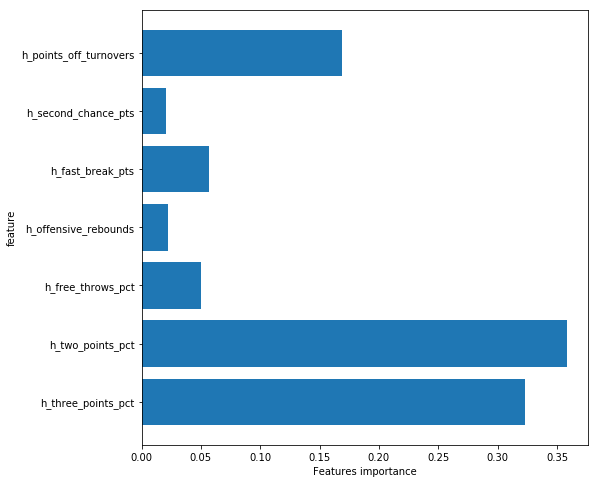

In [116]:
def plot_feature_importances(model):
    n_features = C_oh_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), C_oh_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

When removing features we see that two point percentage has the highest importance for predicting the outcome of a game, followed by three point percentage. 

In [117]:
print(ncaa.shape)
ncaa.head(2)

(4155, 91)


,game_id,season,scheduled_date,attendance,lead_changes,times_tied,periods,venue_city,venue_name,venue_capacity,...,a_personal_fouls,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,win_h
0,0557a5b2-0320-4f7d-aa72-f871c01cfd63,2015,2015-11-16,3427.0,0.0,1.0,2.0,Stanford,Maples Pavilion,7392.0,...,30.0,65.0,0.0,13.0,2.0,6.0,4.0,0.0,0.0,1.0
1,f12a8bfb-a4ef-4953-96a3-266cb81c5a0b,2015,2015-11-14,6904.0,20.0,8.0,2.0,Winston-Salem,Lawrence Joel Veterans Memorial Coliseum,14665.0,...,27.0,73.0,0.0,14.0,0.0,34.0,4.0,0.0,0.0,1.0


# Is there home court advantage?

In [118]:
home_win = ncaa[ncaa['win_h'] == 1.0]
print(home_win.shape)

home_loss = ncaa[ncaa['win_h'] == 0]
print(home_loss.shape)

(2847, 91)
(1308, 91)


In [119]:
away_win = ncaa[ncaa['win_h'] == 0]
print(away_win.shape)

away_loss = ncaa[ncaa['win_h'] == 1.0]
print(away_loss.shape)

(1308, 91)
(2847, 91)


In [120]:
home_win_pct = ((home_win.shape[0])/(home_win.shape[0] + home_loss.shape[0]))*100
home_win_pct

68.51985559566786

The tests above show that the home team wins 68% of the time. This shows that there is some home court advatage, but 68% seems rather high. This could be affected by tournament games and neutral sites. Thhese features were removed from the data set because they had a large amount of null values. One way these fetaures could increase home winning percentage is often in tournament games the higher seed is considered the home team.

# How many points do you need to win?
First find the mean points scored by both teams, home and away.

In [121]:
h_points_mean = ncaa.h_points.mean()
h_points_mean

76.15451263537906

In [122]:
a_points_mean = ncaa.a_points.mean()
a_points_mean

69.13983152827919

It is not surprising the mean points scored for the home team is higher than away given that we found the home team wins about 68.5% of the time. We will continue running tests for the home team.

In [123]:
pts_game = ncaa[ncaa['h_points'] >= 75]
pts_win = pts_game[pts_game['win_h'] == 1.0]

In [124]:
print(pts_game.shape)
print(pts_win.shape)

(2297, 91)
(1964, 91)


The first values, points per game, is the number of times the home team scored 75 or more points in the game. The second set is the number of times the home team scored 75 or mores points and won the game. We will use this values to see how often a team can score 75 points and win.

In [125]:
win_pct = (pts_win.shape[0])/(pts_game.shape[0])*100
win_pct

85.50282977797127

If the home team score 75 points, they will win 85% of the time.

In [126]:
w = ncaa.loc[ncaa["win_h"] == 1.0]
l = ncaa.loc[ncaa["win_h"] == 0]

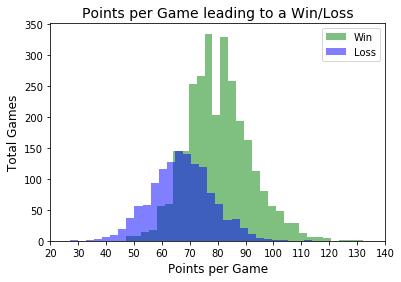

In [127]:
win = w.h_points
loss = l.h_points
plt.hist(win, alpha=0.5, bins=30, align='mid', label='Win', color='green')
plt.hist(loss, alpha=0.5, bins=30, align='mid', label='Loss', color='blue')
plt.xlim(20,140)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Points per Game', fontsize=12)
plt.ylabel('Total Games', fontsize=12)
plt.legend()
plt.title('Points per Game leading to a Win/Loss', fontsize=14);

# What 2pt% do you need to win the game???
Start by finding the average two point score percentage 

In [128]:
h_two_pct_mean = ncaa.h_two_points_pct.mean()
h_two_pct_mean

51.80897063778587

In [129]:
two_pct_game = ncaa[ncaa['h_two_points_pct'] >= 60]
two_pct_win = two_pct_game[two_pct_game['win_h'] == 1.0]

In [130]:
print(two_pct_game.shape)
print(two_pct_win.shape)

(844, 91)
(746, 91)


The first values, two point percentage, is percentrage of made two point shots during the game. The second set is the percentage of made two points shots during the game that lead to a win. We will use this values to see how often a team can shoot and make 60% of their two point shots.

In [131]:
win_pct = (two_pct_win.shape[0])/(two_pct_game.shape[0])*100
win_pct

88.38862559241706

This shows that when the home team shoots 60% for two points shots during a game they will win 88% of the time.

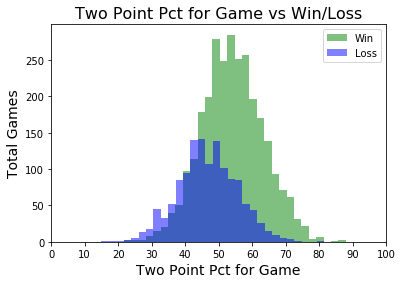

In [132]:
win = w.h_two_points_pct
loss = l.h_two_points_pct
plt.hist(win, alpha=0.5, bins=30, align='mid', label='Win', color='green')
plt.hist(loss, alpha=0.5, bins=30, align='mid', label='Loss', color='blue')
plt.xlim(0,100)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Two Point Pct for Game', fontsize=14)
plt.ylabel('Total Games', fontsize=14)
plt.legend()
plt.title('Two Point Pct for Game vs Win/Loss', fontsize=16);

# What 3pt% do you need to win the game???

Find the average of three points made during the game

In [133]:
h_three_pct_mean = ncaa.h_three_points_pct.mean()
h_three_pct_mean

36.06264741275572

In [134]:
three_pct_game = ncaa[ncaa['h_three_points_pct'] >= 45]
three_pct_win = three_pct_game[three_pct_game['win_h'] == 1.0]

In [135]:
print(three_pct_game.shape)
print(three_pct_win.shape)

(849, 91)
(755, 91)


The first values, Three percentage, is number of times the home teams made 45% of their threes during the game. The second set is the number of times the home team made 45% of threes and won the game. We will use this values to see how often a team can make 45% of their threes and win.

In [136]:
win_pct = (three_pct_win.shape[0])/(three_pct_game.shape[0])*100
win_pct

88.92815076560659

When the home team makes 45% of their three point shots they will win 89% of the time.

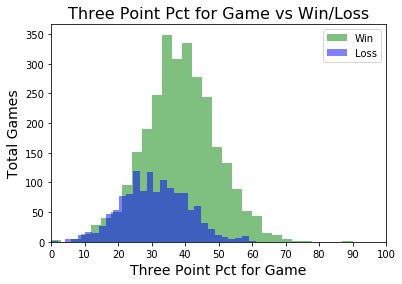

In [137]:
win = w.h_three_points_pct
loss = l.h_three_points_pct
plt.hist(win, alpha=0.5, bins=30, align='mid', label='Win', color='green')
plt.hist(loss, alpha=0.5, bins=30, align='mid', label='Loss', color='blue')
plt.xlim(0,100)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Three Point Pct for Game', fontsize=14)
plt.ylabel('Total Games', fontsize=14)
plt.legend()
plt.title('Three Point Pct for Game vs Win/Loss', fontsize=16);